<a href="https://colab.research.google.com/github/Codebyjanhvi/Bilateral-Debt/blob/main/BilateralDebt_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install pandas matplotlib seaborn openpyxl


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
file_path = "/content/Book1.xlsx"
df = pd.read_excel(file_path)


df.head(15)

,Row Labels,BGD,BTN,LKA,MDV,MMR,NPL,Grand Total
0,2000,5777731.5,8.403782e+07,15291160.2,0,12250000.0,0.0,1.173567e+08
1,2001,5606247.4,1.389804e+08,12779033.2,0,15550000.0,0.0,1.729157e+08
2,2002,5623756.0,2.002773e+08,28929017.3,0,18166922.9,0.0,2.529970e+08
3,2003,5922144.3,2.788451e+08,68540000.0,0,23739076.7,0.0,3.770463e+08
4,2004,6197292.6,3.607734e+08,98010000.0,0,39384995.4,0.0,5.043657e+08
5,2005,5993764.6,3.971405e+08,103799000.0,0,56164743.9,0.0,5.630980e+08
6,2006,5713278.3,4.245941e+08,126106000.0,0,68550816.8,0.0,6.249642e+08
7,2007,6168032.5,4.650199e+08,138902000.0,0,84755012.5,0.0,6.948450e+08
8,2008,5017294.4,3.605271e+08,136086000.0,0,114104415.9,0.0,6.157349e+08
9,2009,67480.7,4.046166e+08,156509000.0,82317057,146719283.0,5378000.0,7.956074e+08


In [11]:
print(df.columns)


Index(['row_labels', 'bgd', 'btn', 'lka', 'mdv', 'mmr', 'npl', 'grand_total'], dtype='object')


Data Clening

In [14]:
# Rename first column properly
df.rename(columns={df.columns[0]: "Year"}, inplace=True)

# Remove 'Grand Total' row if exists
df = df[df['Year'] != "Grand Total"]

# Clean $ and commas from all country columns
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(r'[$,]', '', regex=True).str.replace(r'\s+', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Year column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop NA years
df = df.dropna(subset=['Year'])

df.head(10)



,Year,bgd,btn,lka,mdv,mmr,npl,grand_total
0,2000,5777731.5,84037822.6,15291160.2,0,12250000.0,0.0,117356714.3
1,2001,5606247.4,138980448.4,12779033.2,0,15550000.0,0.0,172915729.0
2,2002,5623756.0,200277285.0,28929017.3,0,18166922.9,0.0,252996981.2
3,2003,5922144.3,278845099.7,68540000.0,0,23739076.7,0.0,377046320.7
4,2004,6197292.6,360773408.3,98010000.0,0,39384995.4,0.0,504365696.3
5,2005,5993764.6,397140508.1,103799000.0,0,56164743.9,0.0,563098016.6
6,2006,5713278.3,424594055.8,126106000.0,0,68550816.8,0.0,624964150.9
7,2007,6168032.5,465019934.0,138902000.0,0,84755012.5,0.0,694844979.0
8,2008,5017294.4,360527148.9,136086000.0,0,114104415.9,0.0,615734859.2
9,2009,67480.7,404616580.9,156509000.0,82317057,146719283.0,5378000.0,795607401.6


In [15]:
# Reshape from wide → long format
df_long = df.melt(id_vars="Year", var_name="Country", value_name="Debt")

# Drop missing or zero debts
df_long = df_long.dropna()
df_long = df_long[df_long['Debt'] > 0]

df_long.head(10)


,Year,Country,Debt
0,2000,bgd,5777731.5
1,2001,bgd,5606247.4
2,2002,bgd,5623756.0
3,2003,bgd,5922144.3
4,2004,bgd,6197292.6
5,2005,bgd,5993764.6
6,2006,bgd,5713278.3
7,2007,bgd,6168032.5
8,2008,bgd,5017294.4
9,2009,bgd,67480.7


Highest Debt Country (2000–2020)

/tmp/ipython-input-3180384695.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_total, x="Debt", y="Country", palette="Blues_r")


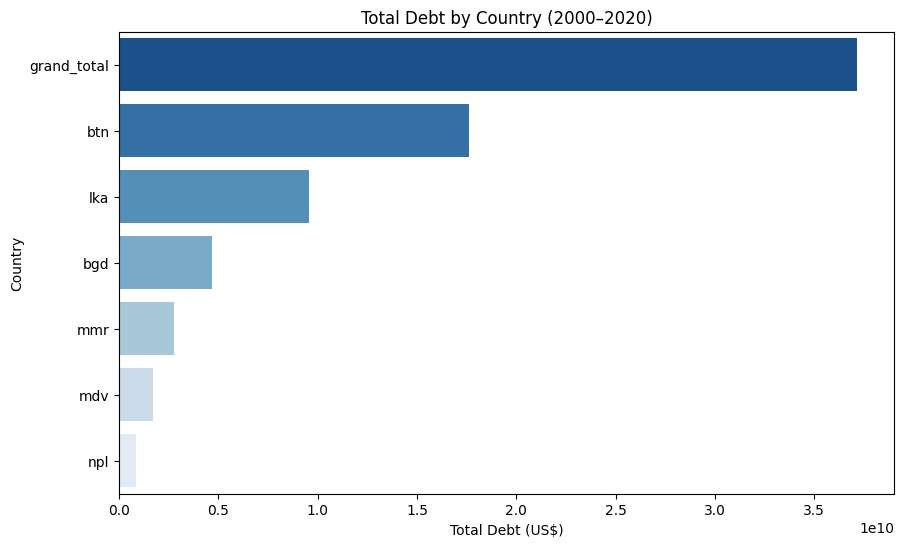

In [16]:
# Total debt by country
country_total = df_long.groupby("Country")["Debt"].sum().reset_index().sort_values(by="Debt", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=country_total, x="Debt", y="Country", palette="Blues_r")
plt.title("Total Debt by Country (2000–2020)")
plt.xlabel("Total Debt (US$)")
plt.ylabel("Country")
plt.show()


Debt Trend Over Time

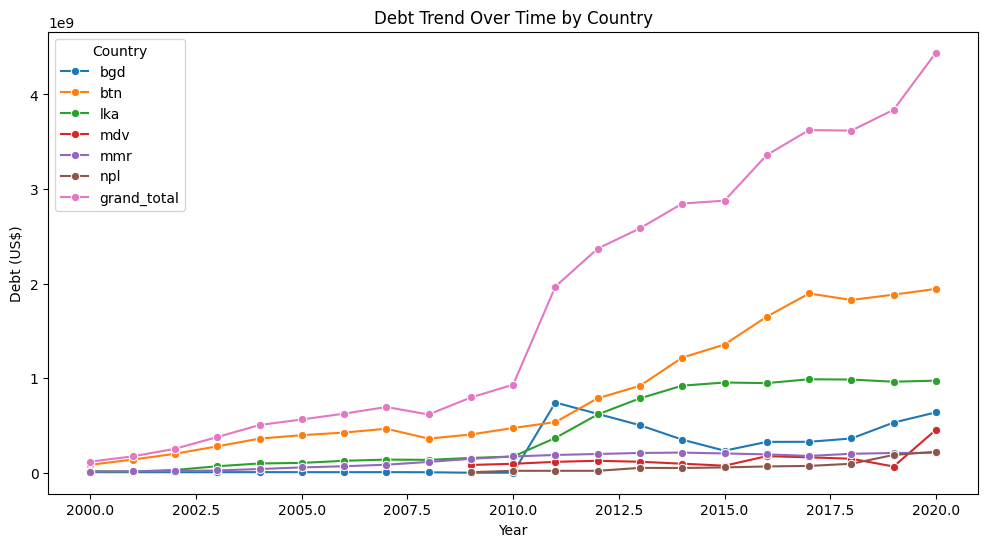

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_long, x="Year", y="Debt", hue="Country", marker="o")
plt.title("Debt Trend Over Time by Country")
plt.ylabel("Debt (US$)")
plt.xlabel("Year")
plt.legend(title="Country")
plt.show()


Top 3 Countries per Year

/tmp/ipython-input-1125179581.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_yearly = df_long.groupby("Year").apply(lambda x: x.nlargest(3, "Debt")).reset_index(drop=True)


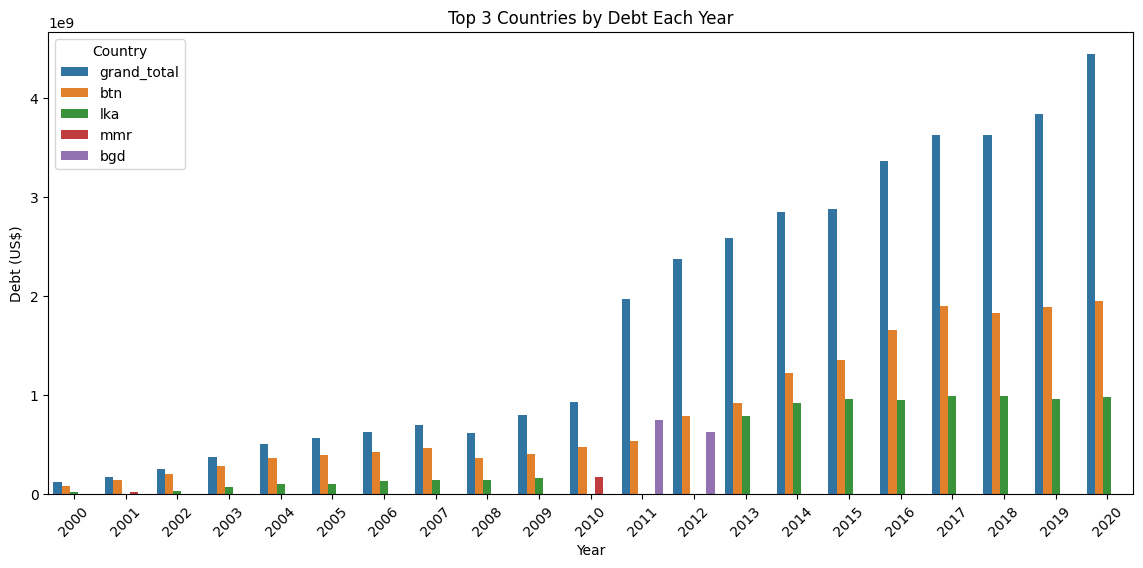

In [18]:
top3_yearly = df_long.groupby("Year").apply(lambda x: x.nlargest(3, "Debt")).reset_index(drop=True)

plt.figure(figsize=(14,6))
sns.barplot(data=top3_yearly, x="Year", y="Debt", hue="Country")
plt.title("Top 3 Countries by Debt Each Year")
plt.xticks(rotation=45)
plt.ylabel("Debt (US$)")
plt.xlabel("Year")
plt.legend(title="Country")
plt.show()
